# **Hasham Asim**

# **B21F0189AI020**

# **Artificial Intelligence**

# **Assignment 3**


# **Octopus Camouflage Optimization Algorithm**

# **Importing Images Dataset (EILAT) :**

This is EILATE dataset which contain 10 folders containing diffenet underwater images with differnt conditions ,which i will use for Environmnet for Octupus .

# **How this will Work:**
This will traverses a specified directory, checks each subdirectory for image files with specific extensions, loads these images using OpenCV, and stores them in a list. It also prints messages indicating the progress and the number of images loaded.

In [1]:
import os
import cv2

# Define the directory path containing the folders
directory_path = "/content/EILAT/EILAT/"

# Initialize an empty list to store images
images = []

# Loop through each folder in the directory
for folder_name in os.listdir(directory_path):
    folder_path = os.path.join(directory_path, folder_name)

    # Check if the path is a directory
    if os.path.isdir(folder_path):
        print(f"Loading images from folder: {folder_name}")

        # Loop through each image file in the folder
        for file_name in os.listdir(folder_path):
            file_path = os.path.join(folder_path, file_name)

            # Check if the file is an image
            if file_name.endswith(('.jpg', '.jpeg', '.png')):
                # Read the image and append it to the list
                image = cv2.imread(file_path)
                if image is not None:
                    images.append(image)
            else:
                print(f"Ignoring non-image file: {file_name}")

# Display the number of images loaded
print(f"Total images loaded: {len(images)}")

Loading images from folder: A04
Loading images from folder: A05
Loading images from folder: A03
Loading images from folder: A01
Ignoring non-image file: .svn
Loading images from folder: A07
Loading images from folder: A08
Ignoring non-image file: .svn
Loading images from folder: A06
Loading images from folder: .svn
Ignoring non-image file: entries
Ignoring non-image file: tmp
Ignoring non-image file: text-base
Ignoring non-image file: props
Ignoring non-image file: prop-base
Loading images from folder: A02
Total images loaded: 1123


# **Plot these Images :**

Next step I did is to plot these images For example i take 100 images because it will be enough for getting results.We can take more images from our dataset which contain 10000 of images .As it is not some model which train and test .So, these images are more than enough.

In [2]:
import matplotlib.pyplot as plt

# Display a sample of loaded images
num_images_to_display = 100
fig, axes = plt.subplots(1, num_images_to_display, figsize=(15, 3))

# Loop through the first few images and display them
for i in range(num_images_to_display):
    axes[i].imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
    axes[i].axis('off')

plt.show()

# **Defining Different Conditions Of Images:**

As the main thing for this octopus Camoflauge algorithm is Environment and there are differnet conditions for Environment which are


*   Light Conditions
*   Color

*   Texture


This code will  processes a list of images to extract features related to light conditions, colors, and textures. It calculates the average brightness (as a measure of light conditions), the mean color values (as a measure of dominant colors), and the variance of grayscale pixel values (as a measure of texture). These features are stored in lists and then converted to numpy arrays.





In [3]:
import cv2
import matplotlib.pyplot as plt
import numpy as np



# Gather data on light conditions, colors, and textures from the images
light_conditions = []  # Placeholder for light conditions data
colors = []  # Placeholder for color data
textures = []  # Placeholder for texture data

for image in images:
    # Extract light conditions data (e.g., brightness, intensity)
    # Example: Calculate average brightness of the image
    brightness = np.mean(cv2.cvtColor(image, cv2.COLOR_BGR2GRAY))
    light_conditions.append(brightness)

    # Extract color data (e.g., dominant colors)
    # Example: Use k-means clustering to identify dominant colors
    # Placeholder code: Using only the first three channels of the image as colors
    color = np.mean(image, axis=(0, 1))
    colors.append(color)

    # Extract texture data (e.g., smoothness, roughness)
    # Example: Placeholder code for texture extraction
    # Placeholder code: Using the variance of the image as a measure of texture
    texture = np.var(cv2.cvtColor(image, cv2.COLOR_BGR2GRAY))
    textures.append(texture)

# Convert lists to numpy arrays for easier manipulation
light_conditions = np.array(light_conditions)
colors = np.array(colors)
textures = np.array(textures)


# **Main Algorithm Which choose Octopus will either blend or mimic based on several Environmental Factores(light conditions,texture and color ):**

In this code we perform:

Define parameters (w_blend and w_mimic) and functions for the optimization algorithm.

Define the blend_decision() function to determine if blending is optimal based on light conditions.

Define the mimicry_decision() function to determine if mimicry is optimal based on colors and textures.

Define the objective_function() to calculate the objective function for optimization, considering both blending and mimicry.

Define the gradient_descent() function to perform the gradient descent optimization algorithm.

Reshape the light conditions and textures arrays for concatenation.
Concatenate the arrays of light conditions, colors, and textures.
Perform gradient descent optimization.

Print the optimized solution.

Define the determine_camouflage_strategy() function to determine whether blending or mimicry is optimal based on the optimized results.

Loop through the optimized results and determine the camouflage strategy for each image.

Print the image index and the corresponding strategy.

In the end our Algorithm will tell us result of the octopus decison to blend or mimic or none of them (to run to choose another enviornment which is more suitable).


We also give some random threshold values for all the condition which we can adjust based on our knowledge of real world ocotpus thinking.

# **How results are being generated :**

# Gradient Descent Optimization:

The gradient_descent function implements the gradient descent optimization algorithm to find the optimal solution for the given objective function. It iteratively adjusts the parameters (light conditions, colors, and textures) to minimize the objective function.

# Optimized Solution:

After running the gradient descent optimization,I obtain an optimized solution optimized_solution, which contains the optimized values for light conditions, colors, and textures.

# Determine Camouflage Strategy:

 The determine_camouflage_strategy function takes the optimized results as input. For each optimized result, it extracts the light conditions, colors, and textures. Then it evaluates whether blending or mimicry is the optimal strategy based on these values.

# Output:

The function prints the strategy for each optimized result. If blending is optimal based on light conditions, it selects the "Blend" strategy. If mimicry is optimal based on colors and textures, it selects the "Mimic" strategy. If neither blending nor mimicry is optimal, it selects "Neither" as the strategy.

In [4]:
# Define parameters and functions for the optimization algorithm
w_blend = 0.5  # Weight for blending optimization
w_mimic = 0.8  # Weight for mimicry optimization

def blend_decision(light_conditions):
    # Check if blending is optimal based on light conditions
    if np.mean(light_conditions) < 100:
        return 1  # Blending is optimal
    else:
        return 0  # Blending is not optimal

def mimicry_decision(colors, textures):
    # Check if mimicry is optimal based on colors and textures
    if np.var(colors) < 300 and np.mean(textures) < 400:
        return 1  # Mimicry is optimal
    else:
        return 0  # Mimicry is not optimal

def objective_function(light_conditions, colors, textures):
    # Objective function to optimize camouflage strategy
    blend_optimal = blend_decision(light_conditions)
    mimicry_optimal = mimicry_decision(colors, textures)

    blend_cost = np.mean(light_conditions)  # Placeholder cost for blending
    mimicry_cost = np.var(colors) + np.mean(textures)  # Placeholder cost for mimicry

    return w_blend * blend_cost + w_mimic * mimicry_cost

def gradient_descent(light_conditions, colors, textures, learning_rate=0.01, max_iterations=1000, tolerance=1e-5):
    # Gradient descent optimization algorithm
    light_conditions_reshaped = light_conditions.reshape(-1, 1)  # Reshape light_conditions to have one column
    textures_reshaped = textures.reshape(-1, 1)  # Reshape textures to have one column

    x = np.hstack((light_conditions_reshaped, colors, textures_reshaped))  # Concatenate arrays
    for i in range(max_iterations):
        # Compute the gradient numerically using finite differences
        grad = np.zeros_like(x[i])
        for j in range(len(x[i])):
            x_plus_h = x[i].copy()
            x_plus_h[j] += 1e-5  # Small perturbation
            x_minus_h = x[i].copy()
            x_minus_h[j] -= 1e-5  # Small perturbation
            grad[j] = (objective_function(x_plus_h[0], x_plus_h[1], x_plus_h[2]) - objective_function(x_minus_h[0], x_minus_h[1], x_minus_h[2])) / (2 * 1e-5)

        x[i] -= learning_rate * grad  # Update solution for each row

        # Check convergence
        if np.linalg.norm(grad) < tolerance:
            break

    return x


# Run gradient descent optimization algorithm
optimized_solution = gradient_descent(light_conditions, colors, textures)

# Print optimized solution
print("Optimized solution (light conditions, colors, textures):", optimized_solution)


# Determine whether octopus should blend or mimic based on optimized results
def determine_camouflage_strategy(optimized_results):
    for i, result in enumerate(optimized_results):
        light_conditions = result[0]
        colors = result[1:4]
        textures = result[4]

        if blend_decision(light_conditions) == 1:
            strategy = "Blend"
        elif mimicry_decision(colors, textures) == 1:
            strategy = "Mimic"
        else:
            strategy = "Neither"

        print(f"Image {i + 1}: Strategy = {strategy}")

# Call the function with the optimized solution
determine_camouflage_strategy(optimized_solution)

Optimized solution (light conditions, colors, textures): [[ 105.71277344  100.11376953  107.92583789  103.44726562  750.0731802 ]
 [  55.05481445   39.08569336   65.28692187   41.02636719  156.60067028]
 [  81.14294922   53.18652344   93.09063281   68.3737793   553.23787665]
 ...
 [ 113.59985352  113.23217773  113.69702148  113.54516602 3292.92997068]
 [  46.25366211   37.62768555   52.8125       36.61645508  615.57164186]
 [  86.87207031   62.45483398   96.73925781   76.78662109 2785.47630978]]
Image 1: Strategy = Neither
Image 2: Strategy = Blend
Image 3: Strategy = Blend
Image 4: Strategy = Neither
Image 5: Strategy = Neither
Image 6: Strategy = Blend
Image 7: Strategy = Neither
Image 8: Strategy = Neither
Image 9: Strategy = Neither
Image 10: Strategy = Neither
Image 11: Strategy = Neither
Image 12: Strategy = Blend
Image 13: Strategy = Neither
Image 14: Strategy = Blend
Image 15: Strategy = Neither
Image 16: Strategy = Neither
Image 17: Strategy = Neither
Image 18: Strategy = Neit

# **Plotting the Results:**

Based on the images i give and the threshold i choose the octopus will most likely to choose blend more than mimic and as we can see there are more images where octopus will choose neither because their values are not matched with threshold so they are not suitable.

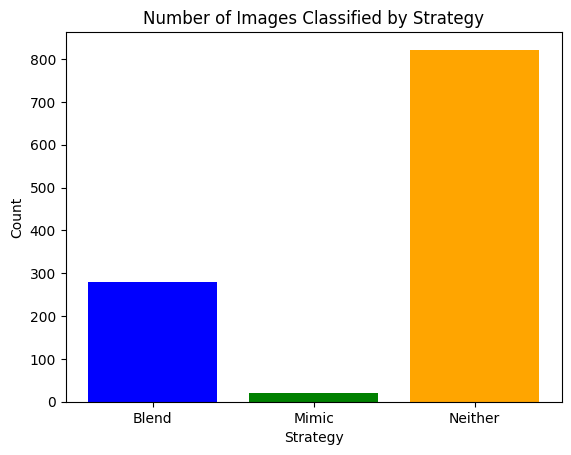

In [5]:
import matplotlib.pyplot as plt

# Define a function to count the occurrences of each strategy
def count_strategies(optimized_results):
    blend_count = 0
    mimic_count = 0
    neither_count = 0

    for result in optimized_results:
        light_conditions = result[0]
        colors = result[1:4]
        textures = result[4]

        if blend_decision(light_conditions) == 1:
            blend_count += 1
        elif mimicry_decision(colors, textures) == 1:
            mimic_count += 1
        else:
            neither_count += 1

    return blend_count, mimic_count, neither_count

# Call the function to count the occurrences of each strategy
blend_count, mimic_count, neither_count = count_strategies(optimized_solution)

# Plot the counts
labels = ['Blend', 'Mimic', 'Neither']
counts = [blend_count, mimic_count, neither_count]

plt.bar(labels, counts, color=['blue', 'green', 'orange'])
plt.xlabel('Strategy')
plt.ylabel('Count')
plt.title('Number of Images Classified by Strategy')
plt.show()

# **Prediciton On Image:**


Here is a simpler version of my Algorithm which working is same .
I have donwlaoded a Underwater image and perfrom this Algorithm on image and it tell me in this image and Enviroment Octopus will likely to choose blend.

In [7]:
import numpy as np
import cv2

# Define parameters and functions for the optimization algorithm
w_blend = 0.5  # Weight for blending optimization
w_mimic = 0.8  # Weight for mimicry optimization

def blend_decision(light_conditions):
    # Check if blending is optimal based on light conditions
    if np.mean(light_conditions) < 100:
        return 1  # Blending is optimal
    else:
        return 0  # Blending is not optimal

def mimicry_decision(colors, textures):
    # Check if mimicry is optimal based on colors and textures
    if np.var(colors) < 300 and np.mean(textures) < 400:
        return 1  # Mimicry is optimal
    else:
        return 0  # Mimicry is not optimal

def determine_camouflage_strategy(light_conditions, colors, textures):
    # Determine camouflage strategy for a single image
    if blend_decision(light_conditions) == 1:
        strategy = "Blend"
    elif mimicry_decision(colors, textures) == 1:
        strategy = "Mimic"
    else:
        strategy = "Neither"

    return strategy

# Function to extract features from an image
def extract_features(image_path):
    # Read the image
    image = cv2.imread(image_path)
    # Perform necessary processing to extract features such as light conditions, colors, and textures
    # Example: Calculate mean intensity for light conditions, extract color features, analyze textures, etc.
    light_conditions = np.mean(image)
    colors = np.mean(image, axis=(0, 1))  # Mean color values across channels
    textures = np.var(image)  # Variance of pixel values as a measure of texture

    return light_conditions, colors, textures

# Function to predict camouflage strategy for a given image
def predict_camouflage_strategy(image_path):
    light_conditions, colors, textures = extract_features(image_path)
    strategy = determine_camouflage_strategy(light_conditions, colors, textures)
    return strategy

# Example usage:
image_path = "/content/alexandros-giannakakis-T5jskLh3xxs-unsplash (1).jpg"
predicted_strategy = predict_camouflage_strategy(image_path)
print("Predicted camouflage strategy:", predicted_strategy)

Predicted camouflage strategy: Blend


# **Insights:**

**Modularity:**

My code is modular means it is simple to understand , with separate functions for data gathering, decision making, optimization, and strategy determination. This modular structure makes the code easier to understand, maintain, and debug.

**Clarity of Logic:**

The logic in my code is clear and well-structured. Each function has a specific purpose, and the code follows a logical flow from data gathering to strategy determination.

**Parameterization:**

This code have  parameterized key aspects of the algorithm, such as the weights for blending and mimicry (w_blend and w_mimic) and optimization parameters like learning rate and maximum iterations. This allows for flexibility in tuning the algorithm's behavior.

**Readability:**

This code is readable, with meaningful variable names and descriptive comments explaining the purpose of each function and key steps in the algorithm.

**Optimization:**

The use of gradient descent for optimization is a common and effective choice. However, it's worth considering alternative optimization algorithms or techniques depending on the problem's characteristics and performance requirements.

**Performance:**

The performance of this code may vary depending on factors such as dataset size, image complexity, and computational resources. Profiling the code and analyzing its runtime behavior can help identify potential bottlenecks and optimize performance.